### In winsorization method keep the range between 1 to 99 percent 
#### consider remaining as outliers 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(r'c:\Users\Admin\Documents\DataSets\weight-height.csv',encoding='Latin')

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Weight', ylabel='Count'>

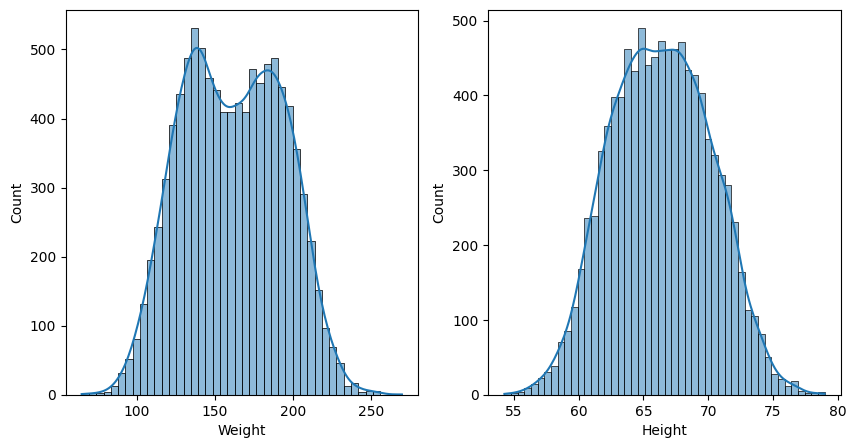

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(122)
sns.histplot(df['Height'],kde=True)
plt.subplot(121)
sns.histplot(df['Weight'],kde=True)

<Axes: ylabel='Weight'>

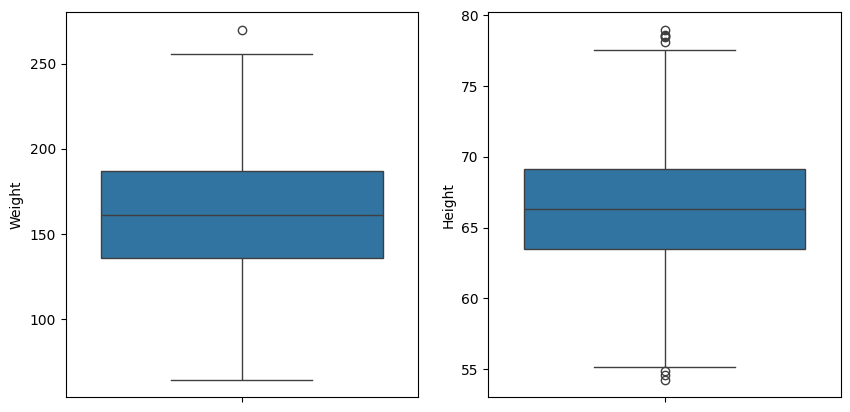

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(122)
sns.boxplot(df['Height'])
plt.subplot(121)
sns.boxplot(df['Weight'])


Height shows more no of outliers then weight 

In [13]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [16]:
upper_limit = df['Height'].quantile(0.99)
upper_limit.item()

74.7857900583366

In [17]:
lower_limit = df['Height'].quantile(0.01)
lower_limit.item()

58.13441158671655

In [ ]:
df[(df['Height']>=74.78)|(df['Height']<=58.13)] # outliers

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### Capping ---> winsorization

In [20]:
df['Height']=np.where(
    df['Height']>=upper_limit,
    upper_limit,
    np.where(
        df['Height']<=lower_limit,
        lower_limit,
        df['Height']
    )
)

In [21]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: ylabel='Height'>

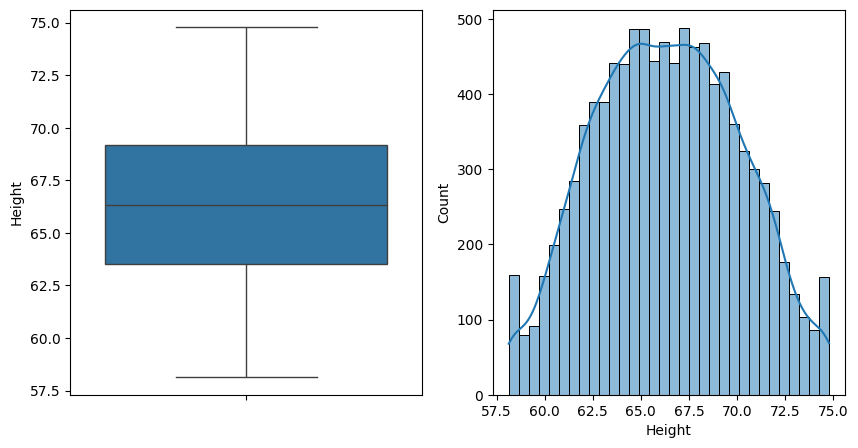

In [ ]:
# no outliers remaining 
plt.figure(figsize=(10,5))
plt.subplot(122)
sns.histplot(df['Height'],kde=True)
plt.title('Distribution of Height')

plt.subplot(121)
sns.boxplot(df['Height'])
plt.title('Boxplot of Height')
